# Fitting interaction paramaters for mixtures


This notebook has the purpose of showing examples of how to fit interaction parameters for binary mixtures using experimental equilbrium data.

In [1]:
import numpy as np
from phasepy import component, mixture, prsveos

In [2]:
#Vapor Liquid equilibria data obtanied from Rieder, Robert M. y A. Ralph Thompson (1949).
# «Vapor-Liquid Equilibria Measured by a GillespieStill - Ethyl Alcohol - Water System». 
#Ind. Eng. Chem. 41.12, 2905-2908.

#Saturation Pressure in bar
Pexp = np.array([1.013, 1.013, 1.013, 1.013, 1.013, 1.013, 1.013, 1.013, 1.013,
       1.013, 1.013, 1.013, 1.013, 1.013, 1.013, 1.013, 1.013, 1.013,
       1.013, 1.013, 1.013, 1.013, 1.013, 1.013, 1.013, 1.013, 1.013,
       1.013, 1.013, 1.013, 1.013, 1.013, 1.013, 1.013])

#Saturation temeprature in Kelvin
Texp = np.array([372.45, 370.05, 369.15, 369.15, 368.75, 367.95, 366.95, 366.65,
       366.05, 363.65, 363.65, 362.55, 361.55, 361.75, 360.35, 358.55,
       357.65, 357.15, 356.55, 356.15, 355.45, 355.15, 354.55, 354.65,
       354.35, 354.05, 353.65, 353.35, 353.15, 352.65, 351.95, 351.65,
       351.55, 351.45])

#Liquid fraction mole array
Xexp = np.array([[0.0028, 0.0118, 0.0137, 0.0144, 0.0176, 0.0222, 0.0246, 0.0302,
        0.0331, 0.0519, 0.053 , 0.0625, 0.0673, 0.0715, 0.0871, 0.126 ,
        0.143 , 0.172 , 0.206 , 0.21  , 0.255 , 0.284 , 0.321 , 0.324 ,
        0.345 , 0.405 , 0.43  , 0.449 , 0.506 , 0.545 , 0.663 , 0.735 ,
        0.804 , 0.917 ],
       [0.9972, 0.9882, 0.9863, 0.9856, 0.9824, 0.9778, 0.9754, 0.9698,
        0.9669, 0.9481, 0.947 , 0.9375, 0.9327, 0.9285, 0.9129, 0.874 ,
        0.857 , 0.828 , 0.794 , 0.79  , 0.745 , 0.716 , 0.679 , 0.676 ,
        0.655 , 0.595 , 0.57  , 0.551 , 0.494 , 0.455 , 0.337 , 0.265 ,
        0.196 , 0.083 ]])
#Vapor fraction mole array
Yexp = np.array([[0.032, 0.113, 0.157, 0.135, 0.156, 0.186, 0.212, 0.231, 0.248,
        0.318, 0.314, 0.339, 0.37 , 0.362, 0.406, 0.468, 0.487, 0.505,
        0.53 , 0.527, 0.552, 0.567, 0.586, 0.586, 0.591, 0.614, 0.626,
        0.633, 0.661, 0.673, 0.733, 0.776, 0.815, 0.906],
       [0.968, 0.887, 0.843, 0.865, 0.844, 0.814, 0.788, 0.769, 0.752,
        0.682, 0.686, 0.661, 0.63 , 0.638, 0.594, 0.532, 0.513, 0.495,
        0.47 , 0.473, 0.448, 0.433, 0.414, 0.414, 0.409, 0.386, 0.374,
        0.367, 0.339, 0.327, 0.267, 0.224, 0.185, 0.094]])

datavle = (Xexp, Yexp, Texp, Pexp)

In [3]:
water = component(name = 'Water', Tc = 647.13, Pc = 220.55, Zc = 0.229, Vc = 55.948, w = 0.344861,
                ksv = [ 0.87292043, -0.06844994],
                Ant =  [  11.72091059, 3852.20302815,  -44.10441047],
                cii = [ 1.16776082e-25, -4.76738739e-23,  1.79640647e-20],
                GC = {'H2O':1})

ethanol = component(name = 'Ethanol', Tc = 514.0, Pc = 61.37, Zc = 0.241, Vc = 168.0, w = 0.643558,
                ksv = [1.27092923, 0.0440421 ],
                Ant = [  12.26474221, 3851.89284329,  -36.99114863],
                cii = [ 2.35206942e-24, -1.32498074e-21,  2.31193555e-19],
                GC = {'CH3':1, 'CH2':1, 'OH(P)':1})

mix = mixture(ethanol, water)

## Fitting QMR mixing rule 

As an scalar is been fitted, scipy recommends to give a certain interval where the minimum could be found, the function ```fit_kij``` handles this optimization. 

In [4]:
from phasepy.fit import fit_kij

mixkij = mix.copy()
fit_kij((-0.15, -0.05), prsveos, mixkij, datavle)

     fun: 0.004884207694592588
    nfev: 17
     nit: 13
 success: True
       x: -0.10726854855739465

## Fitting NRTL interaction parameters 

As an array is been fitted, multidimentional optimization alogirthms are used, the function ```fit_nrtl``` handles this optimization with several options available. If a fixed value of the aleatory factor is used the initial guess has the following form:

nrtl0 = np.array([A12, A21])

If the aleatory factor needs to be optimized it can be included setting alpha_fixed to False, in this case the initial guess has the following form:

nrtl0 = np.array([A12, A21, alpha])

Temperature dependent parameters can be fitted setting the option Tdep = True in ```fit_nrtl```, when this option is used the parameters are computed as:

$$
A12 = A12_0 + A12_1  T \\
A21 = A21_0 + A21_1  T
$$

The initial guess passed to the fit function has the following form:

nrtl0 = np.array([A12_0, A21_0, A12_1, A21_1, alpha])

or, if alpha fixed is used.

nrtl0 = np.array([A12_0, A21_0, A12_1, A21_1])

In [5]:
from phasepy.fit import fit_nrtl
mixnrtl = mix.copy()

#Initial guess of A12, A21
nrtl0 = np.array([-80.,  650.])
fit_nrtl(nrtl0, mixnrtl, datavle, alpha_fixed = True)
#optimized values
[-84.77530335, 648.78439102]

#Initial guess of A12, A21
nrtl0 = np.array([-80.,  650.,  0.2])
fit_nrtl(nrtl0, mixnrtl, datavle, alpha_fixed = False)
#optimized values for A12, A21, alpha
[-5.53112687e+01,  6.72701992e+02,  3.19740734e-01]

[-55.3112687, 672.701992, 0.319740734]

By default Tsonopoulos virial correlation is calculated for vapor phase, if desired ideal gas or Abbott correlation can be used.

In [6]:
from phasepy import ideal_gas, Abbott
#Initial guess of A12, A21
nrtl0 = np.array([-80.,  650.])
fit_nrtl(nrtl0, mixnrtl, datavle, alpha_fixed = True, virialmodel = ideal_gas)
#optimized values
[-86.22483806, 647.6320968 ]

#Initial guess of A12, A21
nrtl0 = np.array([-80.,  650.])
fit_nrtl(nrtl0, mixnrtl, datavle, alpha_fixed = True, virialmodel = Abbott)
#optimized values
[-84.81672981, 648.75311712]

[-84.81672981, 648.75311712]

## Fitting Wilson interaction parameters 

As an array is been fitted, multidimentional optimization alogirthms are used, the function ```fit_wilson``` handles this optimization. 

In [7]:
from phasepy.fit import fit_wilson

mixwilson = mix.copy()
#Initial guess of A12, A21
wilson0 = np.array([-80.,  650.])
fit_wilson(wilson0, mixwilson, datavle)

      fun: 0.00017335336990108893
 hess_inv: array([[13749176.03806976, -6648131.17263055],
       [-6648131.17263055,  3874501.9220601 ]])
      jac: array([-1.14477371e-06, -7.27592123e-07])
  message: 'Optimization terminated successfully.'
     nfev: 164
      nit: 28
     njev: 41
   status: 0
  success: True
        x: array([138.71767077, 503.83175252])

Similarly as when fitting nrtl parameters, Tsonopoulos virial correlation is used by default. Ideal gas or Abbott correlation can be used.

In [8]:
fit_wilson(wilson0, mixwilson, datavle, virialmodel = ideal_gas)
#optimized value
#[105.42279401, 517.2221969 ]

      fun: 0.00024753915807946544
 hess_inv: array([[19655023.18246418, -9768416.05705529],
       [-9768416.05705529,  5518350.19205969]])
      jac: array([-3.91344656e-06, -1.31902925e-06])
  message: 'Optimization terminated successfully.'
     nfev: 160
      nit: 26
     njev: 40
   status: 0
  success: True
        x: array([105.42279401, 517.2221969 ])

## Fitting Redlich-Kister interaction parameters 

As an array is been fitted, multidimentional optimization alogirthms are used, the function ```fit_rk``` handles this optimization. Redlich-Kister expansion is programmed for n terms of the expansion, this fitting function will optimize considering the lenght of the array passed as an initial guess.

If rk0 is an scalar it reduced to Porter model, if it is array of size 2 it reduces to Margules Model.

Temperature dependent parameters can be fitted in which case the initial guess will be splitted into two array.

c, c1 = np.split(rk0, 2) 

Finally the parameters are computed as:

G = c + c1/T

In [9]:
from phasepy.fit import fit_rk
mixrk = mix.copy()
rk0 = np.array([0, 0])
fit_rk(rk0, mixrk, datavle, Tdep =  False)

      fun: 0.00033556181716300605
 hess_inv: array([[ 6.74259369,  6.52230171],
       [ 6.52230171, 18.25993862]])
      jac: array([-1.43026773e-06, -6.69973815e-07])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 11
     njev: 15
   status: 0
  success: True
        x: array([ 1.1759649 , -0.44487888])

In [10]:
fit_rk(rk0, mixrk, datavle, Tdep =  False, virialmodel = ideal_gas)

      fun: 0.00034186307129206684
 hess_inv: array([[ 6.98984885,  6.69984273],
       [ 6.69984273, 18.45910732]])
      jac: array([-1.38117684e-06, -8.30572390e-07])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 11
     njev: 15
   status: 0
  success: True
        x: array([ 1.16854714, -0.43874371])

After the optimizations have been carried out, fitted data can be compared against experimental data.

In [11]:
from phasepy import virialgama, nrtl, wilson, rk
from phasepy.equilibrium import bubbleTy

prkij = prsveos(mixkij)
virialnrtl = virialgama(mixnrtl, actmodel = nrtl)
virialwilson = virialgama(mixwilson, actmodel = wilson)
virialrk = virialgama(mixrk, actmodel = rk)

Ykij = np.zeros_like(Yexp)
Tkij = np.zeros_like(Pexp)
Ynrtl = np.zeros_like(Yexp)
Tnrtl = np.zeros_like(Pexp)
Ywilson = np.zeros_like(Yexp)
Twilson = np.zeros_like(Pexp)
Yrk = np.zeros_like(Yexp)
Trk = np.zeros_like(Pexp)

n = len(Pexp)

for i in range(n):
    Ykij[:,i],Tkij[i] = bubbleTy(Yexp[:,i],Texp[i],Xexp[:,i],Pexp[i],prkij)
    Ynrtl[:,i],Tnrtl[i] = bubbleTy(Yexp[:,i],Texp[i],Xexp[:,i],Pexp[i],virialnrtl)
    Ywilson[:,i],Twilson[i] = bubbleTy(Yexp[:,i],Texp[i],Xexp[:,i],Pexp[i],virialwilson)
    Yrk[:,i],Trk[i] = bubbleTy(Yexp[:,i],Texp[i],Xexp[:,i],Pexp[i],virialrk)

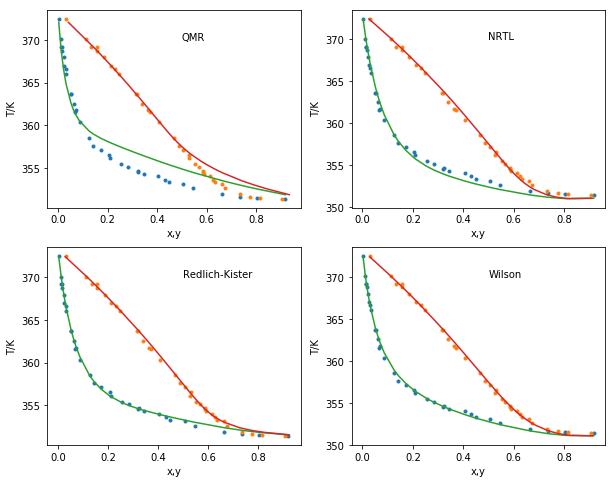

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))

ax=fig.add_subplot(221)
ax.plot(Xexp[0], Texp,'.', Yexp[0], Texp,'.')
ax.plot(Xexp[0], Tkij, Ykij[0], Tkij)
ax.set_xlabel('x,y')
ax.set_ylabel('T/K')
ax.text(0.5, 370, 'QMR')

ax2 = fig.add_subplot(222)
ax2.plot(Xexp[0], Texp,'.', Yexp[0], Texp,'.')
ax2.plot(Xexp[0], Tnrtl, Ynrtl[0], Tnrtl)
ax2.set_xlabel('x,y')
ax2.set_ylabel('T/K')
ax2.text(0.5, 370, 'NRTL')

ax3 = fig.add_subplot(223)
ax3.plot(Xexp[0], Texp,'.', Yexp[0], Texp,'.')
ax3.plot(Xexp[0], Trk, Yrk[0], Trk)
ax3.set_xlabel('x,y')
ax3.set_ylabel('T/K')
ax3.text(0.5, 370, 'Redlich-Kister')

ax4 = fig.add_subplot(224)
ax4.plot(Xexp[0], Texp,'.', Yexp[0], Texp,'.')
ax4.plot(Xexp[0], Twilson, Ywilson[0], Twilson)
ax4.set_xlabel('x,y')
ax4.set_ylabel('T/K')
ax4.text(0.5, 370, 'Wilson')

fig.show()